In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 29

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 29)                319       
                                                                 
Total params: 1,389
Trainable params: 1,389
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/24 [==========================>...] - ETA: 0s - loss: 3.3660 - accuracy: 0.0405
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 4s 43ms/step - loss: 3.3638 - accuracy: 0.0418 - val_loss: 3.3331 - val_accuracy: 0.0323
Epoch 2/1000
13/24 [===============>..............] - ETA: 0s - loss: 3.3154 - accuracy: 0.0529
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 13ms/step - loss: 3.3214 - accuracy: 0.0472 - val_loss: 3.2970 - val_accuracy: 0.0960
Epoch 3/1000
12/24 [==============>...............] - ETA: 0s - loss: 3.2957 - accuracy: 0.0775
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 15ms/step - loss: 3.2910 - accuracy: 0.0751 - val_loss: 3.2641 - val_accuracy: 0.1111
Epoch 4/1000
20/24 [========================>.....] - ETA: 0s - loss: 3.2603 - accuracy: 0.090

19/24 [======================>.......] - ETA: 0s - loss: 2.1020 - accuracy: 0.3096
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 2.1195 - accuracy: 0.3083 - val_loss: 1.6732 - val_accuracy: 0.5283
Epoch 29/1000
19/24 [======================>.......] - ETA: 0s - loss: 2.0915 - accuracy: 0.3154
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 2.0754 - accuracy: 0.3167 - val_loss: 1.6468 - val_accuracy: 0.5364
Epoch 30/1000
21/24 [=========================>....] - ETA: 0s - loss: 2.0653 - accuracy: 0.3237
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 17ms/step - loss: 2.0672 - accuracy: 0.3177 - val_loss: 1.6157 - val_accuracy: 0.5566
Epoch 31/1000
15/24 [=================>............] - ETA: 0s - loss: 2.0495 - accuracy: 0.3323
Epoch 3

19/24 [======================>.......] - ETA: 0s - loss: 1.7804 - accuracy: 0.3956
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 1.7898 - accuracy: 0.3902 - val_loss: 1.2328 - val_accuracy: 0.6808
Epoch 56/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.8456 - accuracy: 0.3824
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.8294 - accuracy: 0.3851 - val_loss: 1.2330 - val_accuracy: 0.6677
Epoch 57/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.7752 - accuracy: 0.3957
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 1.7702 - accuracy: 0.3952 - val_loss: 1.2238 - val_accuracy: 0.6707
Epoch 58/1000
16/24 [===================>..........] - ETA: 0s - loss: 1.7311 - accuracy: 0.4155
Epoch 5

15/24 [=================>............] - ETA: 0s - loss: 1.6733 - accuracy: 0.4307
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 13ms/step - loss: 1.6634 - accuracy: 0.4380 - val_loss: 1.0675 - val_accuracy: 0.6828
Epoch 83/1000
12/24 [==============>...............] - ETA: 0s - loss: 1.6385 - accuracy: 0.4336
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 1.6507 - accuracy: 0.4309 - val_loss: 1.0648 - val_accuracy: 0.7364
Epoch 84/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.6610 - accuracy: 0.4346
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.6475 - accuracy: 0.4336 - val_loss: 1.0669 - val_accuracy: 0.7020
Epoch 85/1000
12/24 [==============>...............] - ETA: 0s - loss: 1.6550 - accuracy: 0.4199
Epoch 8

Epoch 109/1000
 9/24 [==========>...................] - ETA: 0s - loss: 1.5749 - accuracy: 0.4722
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.5672 - accuracy: 0.4724 - val_loss: 0.9957 - val_accuracy: 0.7626
Epoch 110/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.6117 - accuracy: 0.4582
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.6307 - accuracy: 0.4471 - val_loss: 0.9890 - val_accuracy: 0.7788
Epoch 111/1000
16/24 [===================>..........] - ETA: 0s - loss: 1.5847 - accuracy: 0.4595
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 15ms/step - loss: 1.5813 - accuracy: 0.4569 - val_loss: 0.9857 - val_accuracy: 0.7657
Epoch 112/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.5874 - acc

Epoch 136/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.5511 - accuracy: 0.4676
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 12ms/step - loss: 1.5459 - accuracy: 0.4707 - val_loss: 0.9290 - val_accuracy: 0.7970
Epoch 137/1000
13/24 [===============>..............] - ETA: 0s - loss: 1.5361 - accuracy: 0.4766
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.5218 - accuracy: 0.4774 - val_loss: 0.9270 - val_accuracy: 0.7869
Epoch 138/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.5036 - accuracy: 0.4879
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 6ms/step - loss: 1.5196 - accuracy: 0.4848 - val_loss: 0.9237 - val_accuracy: 0.8061
Epoch 139/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.5153 - acc

Epoch 163/1000
21/24 [=========================>....] - ETA: 0s - loss: 1.5030 - accuracy: 0.4903
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.5050 - accuracy: 0.4865 - val_loss: 0.8853 - val_accuracy: 0.8091
Epoch 164/1000
18/24 [=====================>........] - ETA: 0s - loss: 1.4974 - accuracy: 0.4809
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.5197 - accuracy: 0.4768 - val_loss: 0.8828 - val_accuracy: 0.7990
Epoch 165/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.5455 - accuracy: 0.4679
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.5180 - accuracy: 0.4757 - val_loss: 0.8884 - val_accuracy: 0.7949
Epoch 166/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.4766 - accu

Epoch 190/1000
22/24 [==========================>...] - ETA: 0s - loss: 1.4721 - accuracy: 0.4922
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 6ms/step - loss: 1.4716 - accuracy: 0.4933 - val_loss: 0.8547 - val_accuracy: 0.8242
Epoch 191/1000
18/24 [=====================>........] - ETA: 0s - loss: 1.4707 - accuracy: 0.5035
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.4394 - accuracy: 0.5061 - val_loss: 0.8474 - val_accuracy: 0.8343
Epoch 192/1000
18/24 [=====================>........] - ETA: 0s - loss: 1.4830 - accuracy: 0.4996
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.4589 - accuracy: 0.5037 - val_loss: 0.8518 - val_accuracy: 0.8071
Epoch 193/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.4966 - accu

Epoch 217/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.4448 - accuracy: 0.5051
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.4322 - accuracy: 0.5071 - val_loss: 0.8149 - val_accuracy: 0.8343
Epoch 218/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.4295 - accuracy: 0.5247
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.4285 - accuracy: 0.5206 - val_loss: 0.8147 - val_accuracy: 0.8545
Epoch 219/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.4373 - accuracy: 0.5055
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.4566 - accuracy: 0.5051 - val_loss: 0.8242 - val_accuracy: 0.8343
Epoch 220/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.3746 - accu

Epoch 244/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.3872 - accuracy: 0.5299
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.3855 - accuracy: 0.5290 - val_loss: 0.7867 - val_accuracy: 0.8566
Epoch 245/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.3790 - accuracy: 0.5222
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 1.3940 - accuracy: 0.5168 - val_loss: 0.7881 - val_accuracy: 0.8354
Epoch 246/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.4154 - accuracy: 0.5094
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.4186 - accuracy: 0.5040 - val_loss: 0.7800 - val_accuracy: 0.8556
Epoch 247/1000
18/24 [=====================>........] - ETA: 0s - loss: 1.3984 - accu

Epoch 271/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.4239 - accuracy: 0.5063
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.4132 - accuracy: 0.5118 - val_loss: 0.7724 - val_accuracy: 0.8576
Epoch 272/1000
16/24 [===================>..........] - ETA: 0s - loss: 1.3688 - accuracy: 0.5176
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.4018 - accuracy: 0.5162 - val_loss: 0.7709 - val_accuracy: 0.8616
Epoch 273/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.3699 - accuracy: 0.5262
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.3710 - accuracy: 0.5327 - val_loss: 0.7562 - val_accuracy: 0.8515
Epoch 274/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.4062 - accu

Epoch 298/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.3505 - accuracy: 0.5325
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.3466 - accuracy: 0.5334 - val_loss: 0.7477 - val_accuracy: 0.8667
Epoch 299/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.3828 - accuracy: 0.5316
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.3711 - accuracy: 0.5313 - val_loss: 0.7390 - val_accuracy: 0.8636
Epoch 300/1000
16/24 [===================>..........] - ETA: 0s - loss: 1.3469 - accuracy: 0.5542
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 6ms/step - loss: 1.3796 - accuracy: 0.5414 - val_loss: 0.7275 - val_accuracy: 0.8667
Epoch 301/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.3633 - accu

Epoch 325/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.3407 - accuracy: 0.5453
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.3372 - accuracy: 0.5451 - val_loss: 0.7153 - val_accuracy: 0.8697
Epoch 326/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.3957 - accuracy: 0.5199
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.3774 - accuracy: 0.5263 - val_loss: 0.7193 - val_accuracy: 0.8970
Epoch 327/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.3794 - accuracy: 0.5301
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 1.3811 - accuracy: 0.5327 - val_loss: 0.7300 - val_accuracy: 0.8586
Epoch 328/1000
21/24 [=========================>....] - ETA: 0s - loss: 1.3115 - accu

Epoch 352/1000
22/24 [==========================>...] - ETA: 0s - loss: 1.3359 - accuracy: 0.5515
Epoch 352: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 6ms/step - loss: 1.3357 - accuracy: 0.5522 - val_loss: 0.7097 - val_accuracy: 0.8848
Epoch 353/1000
21/24 [=========================>....] - ETA: 0s - loss: 1.3313 - accuracy: 0.5472
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 8ms/step - loss: 1.3328 - accuracy: 0.5438 - val_loss: 0.7114 - val_accuracy: 0.8677
Epoch 354/1000
16/24 [===================>..........] - ETA: 0s - loss: 1.3299 - accuracy: 0.5513
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 1.3164 - accuracy: 0.5559 - val_loss: 0.7035 - val_accuracy: 0.8909
Epoch 355/1000
20/24 [========================>.....] - ETA: 0s - loss: 1.3461 - accu

Epoch 379/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.2698 - accuracy: 0.5630
Epoch 379: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 7ms/step - loss: 1.3184 - accuracy: 0.5509 - val_loss: 0.6875 - val_accuracy: 0.8859
Epoch 380/1000
18/24 [=====================>........] - ETA: 0s - loss: 1.3379 - accuracy: 0.5503
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 1.3448 - accuracy: 0.5509 - val_loss: 0.6914 - val_accuracy: 0.8838
Epoch 381/1000
17/24 [====================>.........] - ETA: 0s - loss: 1.3196 - accuracy: 0.5450
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 1.3090 - accuracy: 0.5526 - val_loss: 0.6933 - val_accuracy: 0.8970
Epoch 382/1000
19/24 [======================>.......] - ETA: 0s - loss: 1.3389 - ac

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.8929


In [13]:
model = tf.keras.models.load_model(model_save_path)

In [14]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 192ms/step
[1.56250360e-06 6.04315910e-15 1.34010561e-05 9.89432980e-10
 3.54865435e-08 1.54557954e-20 2.89092898e-01 6.26562476e-01
 1.43971474e-10 2.22168397e-02 5.90043647e-18 7.33777881e-07
 6.97704490e-06 5.17051539e-08 5.41475638e-05 5.08954413e-02
 5.81694720e-03 1.72356351e-06 1.75868575e-12 1.02705226e-19
 7.59737152e-20 1.98432303e-07 5.37277156e-09 2.01260624e-03
 6.10872949e-11 2.76022882e-04 8.87523813e-04 1.59953088e-05
 2.14435812e-03]
7


31/31 [==============================] - 0s 10ms/step


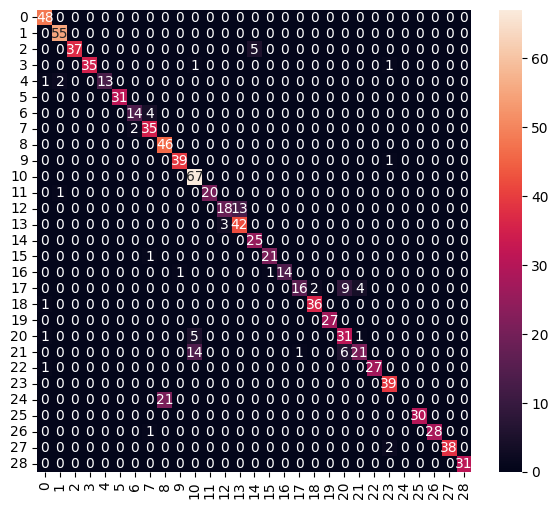

Classification Report


c:\users\star\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       0.95      1.00      0.97        55
           2       1.00      0.88      0.94        42
           3       1.00      0.95      0.97        37
           4       1.00      0.81      0.90        16
           5       1.00      1.00      1.00        31
           6       0.88      0.78      0.82        18
           7       0.85      0.95      0.90        37
           8       0.69      1.00      0.81        46
           9       0.97      0.97      0.97        40
          10       0.77      1.00      0.87        67
          11       1.00      0.95      0.98        21
          12       0.86      0.58      0.69        31
          13       0.76      0.93      0.84        45
          14       0.83      1.00      0.91        25
          15       0.95      0.95      0.95        22
          16       1.00      0.88      0.93        16
          17       0.94    

c:\users\star\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\star\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
model.save(model_save_path, include_optimizer=False)

In [17]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\star\AppData\Local\Temp\tmpaot0g0yb\assets


7588

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5625039e-06 6.0431604e-15 1.3401057e-05 9.8943498e-10 3.5486547e-08
 1.5455797e-20 2.8909290e-01 6.2656254e-01 1.4397149e-10 2.2216819e-02
 5.9004377e-18 7.3377788e-07 6.9770526e-06 5.1705157e-08 5.4147669e-05
 5.0895449e-02 5.8169500e-03 1.7235637e-06 1.7586860e-12 1.0270524e-19
 7.5973715e-20 1.9843235e-07 5.3727711e-09 2.0126081e-03 6.1087295e-11
 2.7602262e-04 8.8752434e-04 1.5995338e-05 2.1443572e-03]
7
